In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
selected_data = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [4]:
# #Data Cleaning
# Q1 = selected_data.quantile(0.25)
# Q3 = selected_data.quantile(0.75)
# IQR = Q3-Q1
# selected_data = selected_data[ ~((selected_data < Q1-1.5*IQR) | (selected_data > Q3+1.5*IQR)).any(axis=1)]

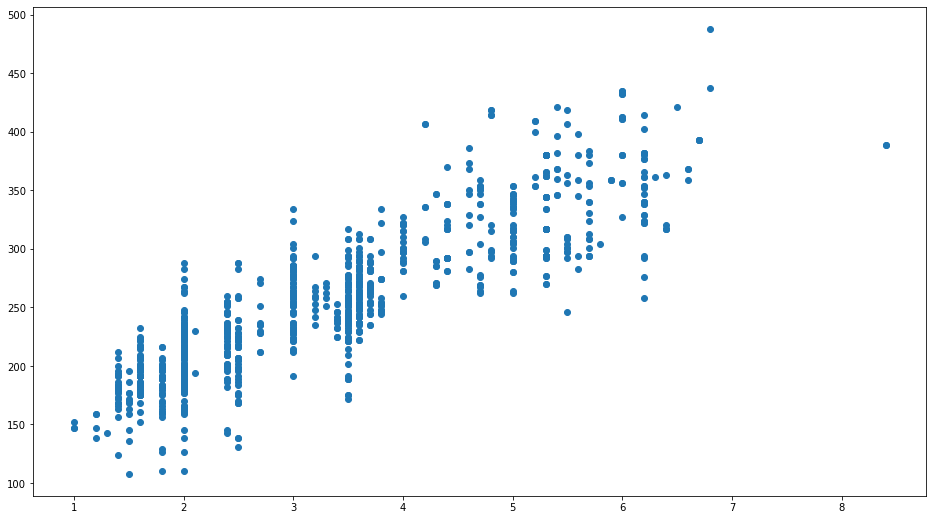

In [5]:
plt.figure(figsize=(16,9))
plt.scatter(selected_data.ENGINESIZE,selected_data.CO2EMISSIONS);

In [6]:
msk = np.random.rand(len(selected_data)) < 0.8
train = selected_data[msk]
test = selected_data[~msk]

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train['ENGINESIZE'].values.reshape(-1,1))
train_y = np.asanyarray(train['CO2EMISSIONS'].values.reshape(-1,1))

test_x = np.asanyarray(test['ENGINESIZE'].values.reshape(-1,1))
test_y = np.asanyarray(test['CO2EMISSIONS'].values.reshape(-1,1))

poly = PolynomialFeatures(degree=5)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[  1.     ,   2.     ,   4.     ,   8.     ,  16.     ,  32.     ],
       [  1.     ,   1.5    ,   2.25   ,   3.375  ,   5.0625 ,   7.59375],
       [  1.     ,   3.5    ,  12.25   ,  42.875  , 150.0625 , 525.21875],
       ...,
       [  1.     ,   3.     ,   9.     ,  27.     ,  81.     , 243.     ],
       [  1.     ,   3.2    ,  10.24   ,  32.768  , 104.8576 , 335.54432],
       [  1.     ,   3.2    ,  10.24   ,  32.768  , 104.8576 , 335.54432]])

In [8]:
poly_regr = linear_model.LinearRegression();
poly_regr.fit(train_x_poly, train_y);
print ('Coefficients: ', poly_regr.coef_)
print ('Intercept: ',poly_regr.intercept_)

Coefficients:  [[ 0.00000000e+00  1.74162228e+02 -7.37718478e+01  1.89120412e+01
  -2.23208754e+00  9.58843335e-02]]
Intercept:  [30.8356434]


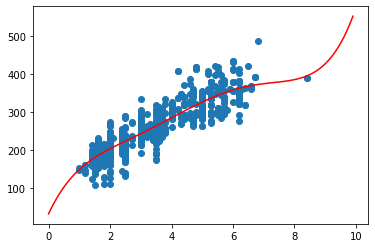

In [9]:
plt.figure()
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
XX = np.arange(0.0,10.0,0.1);
yy = poly_regr.intercept_ + poly_regr.coef_[0][1]*XX + poly_regr.coef_[0][2]*np.power(XX,2) + poly_regr.coef_[0][3]*np.power(XX,3) + poly_regr.coef_[0][4]*np.power(XX,4) + poly_regr.coef_[0][5]*np.power(XX,5)
plt.plot(XX, yy, '-r')
plt.show()

In [10]:
test_x_poly = poly.fit_transform(test_x)
predicted_y = poly_regr.predict(test_x_poly)

In [11]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(predicted_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predicted_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(predicted_y , test_y))

Mean absolute error: 22.49
Residual sum of squares (MSE): 894.98
R2-score: 0.67
